In [3]:
import pandas as pd
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
%matplotlib inline

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')

In [5]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [6]:
train.groupby('hour').mean()['count']

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

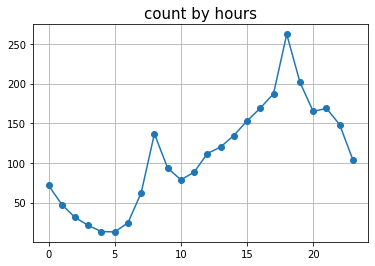

In [7]:
plt.plot(train.groupby('hour').mean()['count'],'o-')
plt.grid()
plt.title('count by hours', fontsize=15)
plt.savefig('pic.png')

<AxesSubplot:>

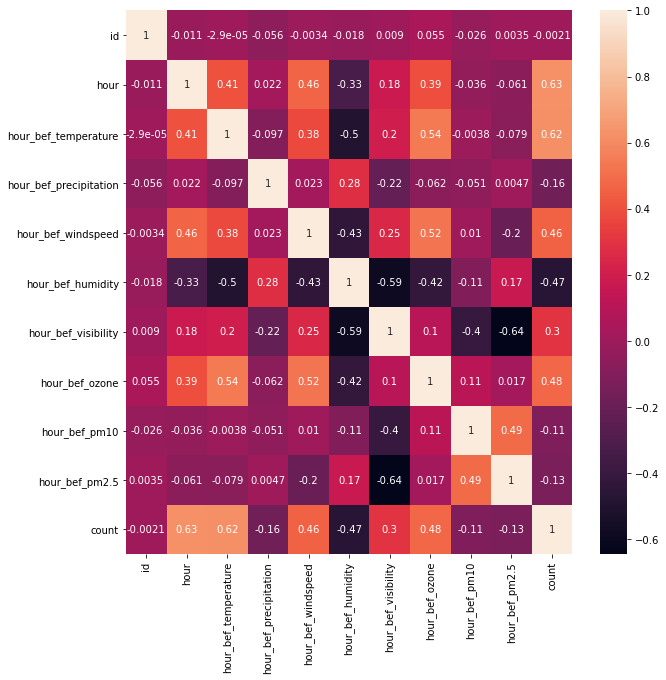

In [8]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)


In [9]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [10]:
train.loc[[18]]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0


In [11]:
train.groupby('hour').mean()['hour_bef_visibility']

hour
0     1434.220339
1     1400.852459
2     1374.278689
3     1326.311475
4     1264.606557
5     1203.426230
6     1146.229508
7     1150.311475
8     1152.868852
9     1189.098361
10    1291.295082
11    1358.868852
12    1469.606557
13    1512.266667
14    1519.721311
15    1528.065574
16    1566.583333
17    1561.733333
18    1581.850000
19    1576.688525
20    1565.557377
21    1590.016667
22    1512.081967
23    1462.508197
Name: hour_bef_visibility, dtype: float64

In [12]:
train[train['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [13]:
train['hour_bef_visibility'].fillna({934:1434.220339,1035:1581.850000}  ,inplace=True)

In [14]:
train['hour_bef_windspeed'].fillna({18: 3.281356, 244: 1.836667, 260: 1.620000, 376: 1.965517, 780:  3.278333, 934: 1.965517 , 1035: 3.838333, 1138: 2.766667, 1229: 1.633333 },inplace=True)

In [15]:
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,1.965517,NaN,1434.220339,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,3.838333,NaN,1581.850000,NaN,NaN,NaN,1.0


In [16]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [17]:
test['hour_bef_temperature'].fillna(19.704918,inplace=True)

In [18]:
test['hour_bef_windspeed'].fillna(3.5950,inplace=True)

In [19]:
features=['hour','hour_bef_temperature','hour_bef_windspeed','hour_bef_ozone','hour_bef_humidity']
X_train=train[features]
Y_train=train['count']
X_test=test[features]

In [20]:
model100=RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1)
model100_5=RandomForestRegressor(n_estimators=100,max_depth=5,random_state=0,n_jobs=-1)
model200=RandomForestRegressor(n_estimators=1000,n_jobs=-1)


In [21]:
model100.fit(X_train,Y_train)
model100_5.fit(X_train,Y_train)
model200.fit(X_train,Y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
pre1=model100.predict(X_test)
pre2=model100_5.predict(X_test)
pre3=model200.predict(X_test)


In [ ]:
submission['count']=pre3

In [22]:
submission.to_csv('model200.csv',index=False)